# Words Analysis

This analysis analyses collected text and meta-data from scientific articles about that mention ERPs.

Available information includes the titles, words, and years of all those papers such that this data can be used for further analysis.

In [1]:
%matplotlib inline

import numpy as np

from lisc import Words
from lisc.data import Articles, ArticlesAll
from lisc.utils import SCDB, load_object
from lisc.utils.io import load_txt_file
from lisc.plts.words import plot_years, plot_wordcloud
from lisc.analysis.words import get_all_counts, get_all_values

In [2]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_count_hist

## Setup

In [3]:
# Settings
SAVE_FIG = True

In [4]:
# Set the file locations
term_dir = '../terms/'
figs_dir = '../data/figures/words'
db = SCDB('../data/')

# Set the name of the file to load
name = 'erps' # 'erps', 'test'

In [5]:
# Load the words object
words = load_object('words_' + name, directory=db, reload_results=True)

In [6]:
# Load exclusions for analysis
exclusions = load_txt_file('analysis_exclusions.txt', term_dir, split_elements=False)

### Check Database Information

Check the metadata about the data collection, including checking the database data were collected from.

In [7]:
# Check database scrape info
words.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210125-2212m.3',
 'count': '32062284',
 'lastupdate': '2021/01/26 14:58'}

In [8]:
# Check requester object info
words.meta_data.requester

{'n_requests': 452,
 'wait_time': 0.1,
 'start_time': '01:22:51 Wednesday 27 January 2021',
 'end_time': '01:54:55 Wednesday 27 January 2021',
 'logging': None}

## HACK

In [9]:
words._labels = [val[0] for val in words.terms]

## Data Organization

In [10]:
# Collect ERPs into list of aggragated data objects
all_data = [ArticlesAll(words[erp], exclusions=exclusions) for erp in words.labels]

### Check Number of Articles

In [11]:
# Check the number of ERPs 
print('Number of ERPs: \t {}'.format(words.n_terms))

Number of ERPs: 	 83


In [12]:
# Check the total number of articles in the collected dataset
n_articles = [data.n_articles for data in all_data]
total_article_count = sum(n_articles)
print('Number of papers: \t', total_article_count)

Number of papers: 	 32145


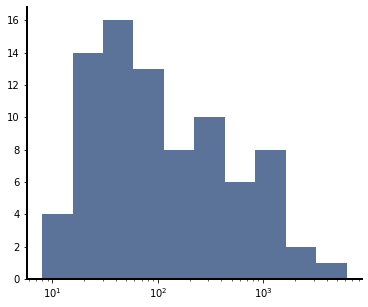

In [13]:
plot_count_hist(n_articles, True,
                save_fig=SAVE_FIG, f_name='erp_hist.pdf', directory=figs_dir)

In [14]:
# Collect all the DOIs across all papers
#dois = get_all_values(all_data, 'dois', unique=True)

In [15]:
# Check the number of unique papers, based on DOIs
#print('Number of unique DOIs: \t', len(set(dois)))

### Collect information across all ERPs & papers

In [16]:
# Get global counts of authors and journals
all_authors = get_all_counts(all_data, 'authors', combine=True)
all_journals = get_all_counts(all_data, 'journals', combine=True)

In [17]:
# Check the most common authors
all_authors.most_common(10)

[(('Näätänen', 'R'), 330),
 (('Wang', 'Y'), 271),
 (('Hajcak', 'G'), 207),
 (('Zhang', 'Y'), 197),
 (('Schröger', 'E'), 193),
 (('Polich', 'J'), 184),
 (('Li', 'H'), 180),
 (('Holcomb', 'PJ'), 176),
 (('Wang', 'L'), 172),
 (('Friederici', 'AD'), 169)]

In [18]:
# Check the most common journals
all_journals.most_common(10)

[('Psychophysiology', 1525),
 ('International journal of psychophysiology : official journal of the International Organization of Psychophysiology',
  1157),
 ('Biological psychology', 975),
 ('Neuropsychologia', 965),
 ('Clinical neurophysiology : official journal of the International Federation of Clinical Neurophysiology',
  946),
 ('Brain research', 793),
 ('Neuroreport', 732),
 ('PloS one', 719),
 ('Journal of cognitive neuroscience', 685),
 ('Neuroscience letters', 680)]

## Check Words

In [19]:
# Check most common words
for data in all_data:
    data.check_frequencies(n_check=5)

P100  : visual, patients, vep, latency, evoked
P150  : patients, group, cells, study, two
P180  : cells, dna, activity, human, polymerase
P200  : patients, processing, p300, amplitude, erp
P220  : cells, expression, de, cell, lymphocytes
P240  : amplitude, stimuli, potentials, stimulus, processing
P250  : patients, processing, components, amplitude, task
P270  : stimuli, stimulus, stimulation, amplitude, components
P300  : patients, amplitude, study, latency, cognitive
P3a   : patients, stimuli, auditory, p3b, processing
P3b   : task, processing, stimuli, p3a, patients
P340  : pain, seps, patients, potentials, results
P350  : erps, erp, processing, stimuli, components
P400  : faces, infants, stimuli, amplitude, processing
P500  : p, different, group, study, two
P550  : subjects, task, sounds, larger, group
P600  : processing, syntactic, semantic, sentences, n400
N75   : visual, vep, patients, p100, evoked
N80   : patients, visual, potentials, evoked, p
N90   : potentials, patients, sti

In [20]:
# Check most common keywords
for data in all_data:
    data.check_frequencies('keywords', n_check=5)

P100  : visual evoked potential, visual evoked potentials, event-related potentials, n170, eeg
P150  : metabolomics, event-related potentials, pregabalin, aging, erps
P180  : tms-eeg, transcranial magnetic stimulation, metabolomics, electroencephalography, targeted metabolomics
P200  : event-related potentials, erp, erps, n400, eeg
P220  : cause-specific infant mortality, maternal education, maternal employment, paternal education, paternal employment
P240  : eeg, somatosensory cortex, touch, chinese three-character verb–object metaphor, contextual effect
P250  : erps, mlpa, n170, p100, velocardiofacial syndrome
P270  : arabidopsis thaliana, medicago truncatula, pisum sativum, plant hormone, rhizophagus irregularis
P300  : event-related potentials, erp, eeg, event-related potential, attention
P3a   : event-related potentials, attention, p300, mismatch negativity, eeg
P3b   : p300, event-related potentials, attention, erp, eeg
P340  : ascorbic acid, auditory processing, eeg, late discri

### Summaries

In [21]:
# Check an example summary
ind = 19
all_data[ind].create_summary()
all_data[ind].print_summary()

N90 :
  Number of articles: 		 53
  First publication: 		 1975
  Most common author: 		 Allison T
    number of publications: 	 3
  Most common journal: 		 Electroencephalography and clinical neurophysiology
    number of publications: 	 4 



### WordCloud Plots

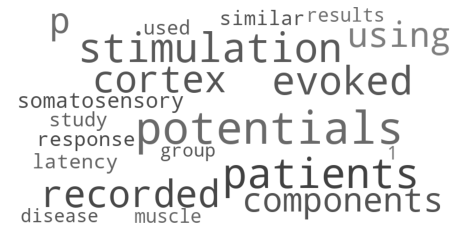

In [22]:
# Create a wordcloud
plot_wordcloud(all_data[ind].words, 20)

### Data Plots

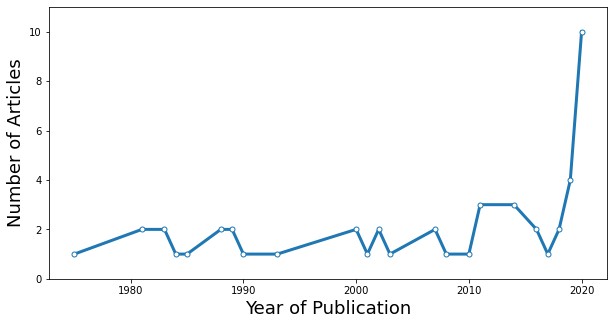

In [23]:
# Check an example history plot
plot_years(all_data[ind].years, [None, 2020])

In [24]:
# Check how many articles were found per ERP
for data in all_data:
    print(data.label, '\t', data.n_articles)

P100 	 1839
P150 	 231
P180 	 131
P200 	 897
P220 	 73
P240 	 34
P250 	 102
P270 	 22
P300 	 6153
P3a 	 1010
P3b 	 1073
P340 	 16
P350 	 73
P400 	 224
P500 	 73
P550 	 18
P600 	 701
N75 	 234
N80 	 126
N90 	 53
N100 	 1037
N110 	 28
N120 	 57
N130 	 45
N140 	 177
N150 	 127
N160 	 82
N170 	 1345
N180 	 41
N190 	 24
N200 	 764
MMN 	 3622
N2a 	 271
N2b 	 323
N2c 	 67
N240 	 21
N250 	 264
N270 	 66
N280 	 22
N2pc 	 495
N300 	 205
N320 	 33
N350 	 84
N380 	 8
N400 	 2538
N450 	 175
N550 	 52
N600 	 15
N700 	 21
late positive component 	 634
late positive potential 	 906
negative slow wave 	 101
positive slow wave 	 110
vertex positive potential 	 57
contingent negative variation 	 1000
post imperative negative variation 	 32
early left anterior negativity 	 33
left anterior negativity 	 53
closure positive shift 	 37
lateralized readiness potential 	 299
late discriminative negativity 	 35
object related negativity 	 37
readiness potential 	 517
error related negativity 	 998
error related